In [1]:
from torch.utils.data import DataLoader
from torchvision import datasets
from ..models import MnistAEC
from utils import *

log_to_stdout()

In [2]:
batch_size = 1
device = torch.device("cpu")
loss_fn = nn.MSELoss()

In [3]:
training_data = datasets.MNIST(
    root="data",
    download=True,
    train=True,
    transform=ToTensor(),
)
test_data = datasets.MNIST(
    root="data",
    download=True,
    train=False,
    transform=ToTensor(),
)

In [4]:
train_dataloader = DataLoader(training_data, batch_size, True)
test_dataloader = DataLoader(test_data, batch_size, True)

In [5]:
model = MnistAEC().to(device)
model.load_state_dict(
    torch.load("finals/MnistAEC.pth", map_location=device), strict=True
)
model.eval()

MnistAEC(
  (encoder): Sequential(
    (0): Conv2d(1, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Softplus(beta=100, threshold=20)
    (3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Softplus(beta=100, threshold=20)
    (6): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Softplus(beta=100, threshold=20)
    (9): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Softplus(beta=100, threshold=20)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=1024, out_features=16, bias=True)
  )
  (decoder): Sequ

In [6]:
for X, labels in test_dataloader:
    break
X = X.to(device)

In [7]:
with torch.no_grad():
    Y = model.encoder(X)

In [8]:
Y

tensor([[ -1.1585,   5.4339,   3.6805,   9.7304,   8.3586, -18.4088,   3.3974,
          -5.4981,  -8.9135,   9.4740, -10.8920,  -1.2861,   8.4928, -10.1125,
          -4.5638,  -8.3088]])

In [9]:
Y.requires_grad_(True)
Z = model.decoder(Y)
G = torch.empty(784, 16)
for i in range(784):
    model.zero_grad()
    if i > 0:
        Y.grad *= 0.0
    torch.flatten(Z)[i].backward(retain_graph=(i < 783))
    G[i] = Y.grad
Z.detach_()

tensor([[[[ 1.0631e-03,  1.5081e-03,  1.0601e-03,  1.6506e-03,  1.0676e-03,
            2.4253e-03,  1.5756e-03,  1.5624e-03,  9.7451e-04,  2.2476e-03,
            1.6698e-03,  2.2936e-03,  2.1560e-03,  2.0799e-03,  9.6971e-04,
            2.0037e-03,  1.2738e-03,  1.8598e-03,  1.1907e-03,  1.9070e-03,
            1.1640e-03,  1.8969e-03,  1.8603e-03,  1.9815e-03,  1.1470e-03,
            2.0077e-03,  2.1775e-03,  7.3370e-04],
          [ 1.2704e-03,  1.1545e-03, -1.0467e-04,  8.8036e-04,  5.1945e-04,
            1.3964e-03,  2.4599e-04,  1.3511e-03,  8.5929e-04,  8.7371e-04,
           -2.4450e-04,  1.3016e-03,  2.4810e-04,  8.2865e-04, -1.1858e-04,
            1.1991e-03,  9.0796e-04,  1.3258e-03,  1.2679e-03,  1.0283e-03,
            1.3476e-03,  8.7169e-04,  8.7455e-04,  9.2611e-04,  9.1910e-04,
            9.8896e-04,  5.9283e-04,  1.4976e-03],
          [ 3.2738e-04,  1.6248e-03, -3.3793e-04,  5.1117e-04,  7.4366e-04,
            5.7566e-04,  5.7489e-05,  4.5630e-04,  1.8207e-03,

In [10]:
H = G.T.resize(16, 28, 28)

/Users/lukas/miniconda3/envs/torch-env/lib/python3.10/site-packages/torch/_tensor.py:755: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [11]:
Y.grad

tensor([[-4.0988e-04,  1.4264e-04,  2.7725e-04,  3.1416e-04, -1.6661e-04,
          5.4801e-04, -6.2286e-04, -1.9472e-04, -1.2008e-04, -7.0835e-06,
          3.6876e-04, -6.2999e-04, -1.8436e-04, -4.0352e-04,  2.1572e-04,
          2.7167e-04]])

In [12]:
H[:, 27, 27]

tensor([-4.0988e-04,  1.4264e-04,  2.7725e-04,  3.1416e-04, -1.6661e-04,
         5.4801e-04, -6.2286e-04, -1.9472e-04, -1.2008e-04, -7.0835e-06,
         3.6876e-04, -6.2999e-04, -1.8436e-04, -4.0352e-04,  2.1572e-04,
         2.7167e-04])

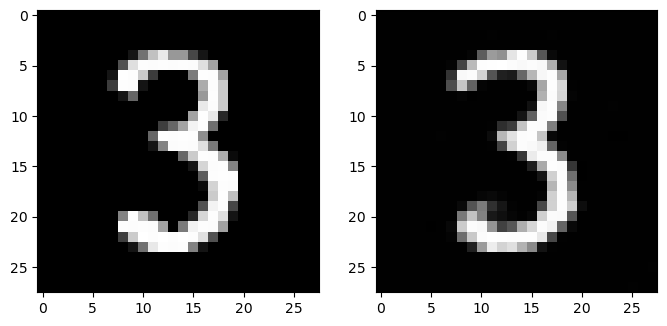

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(X.squeeze(), cmap="gray")
axs[1].imshow(Z.squeeze(), cmap="gray")
plt.show()

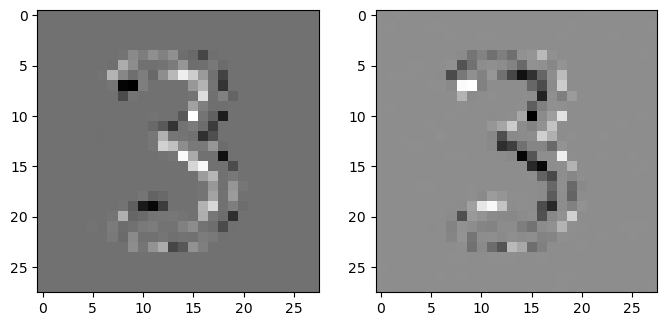

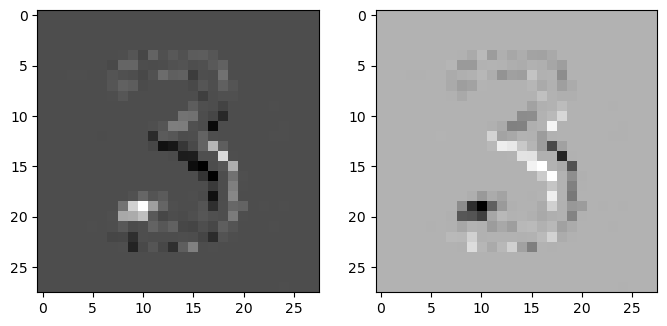

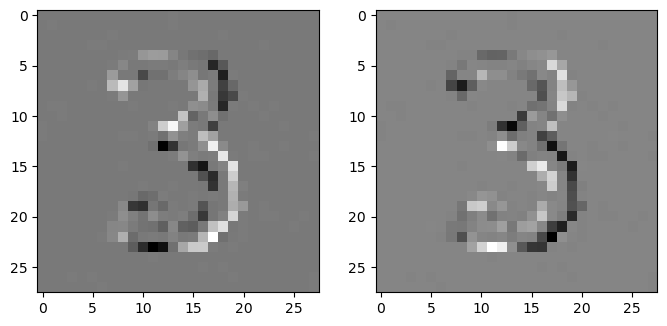

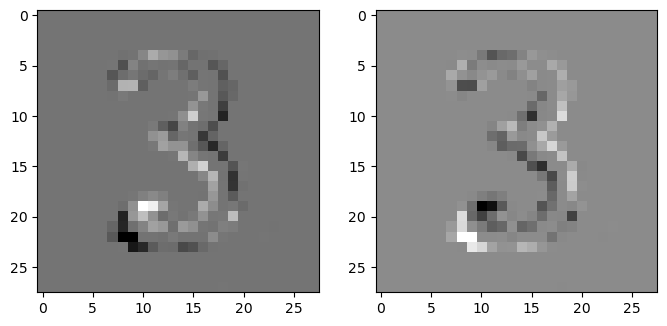

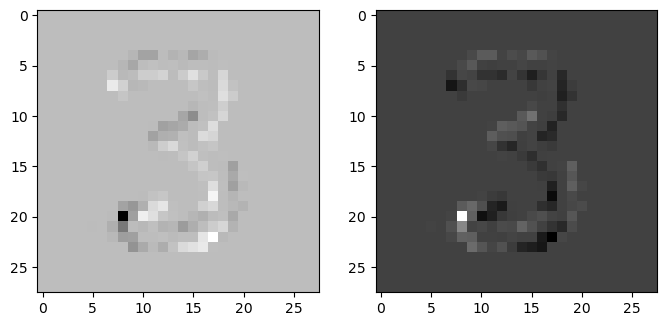

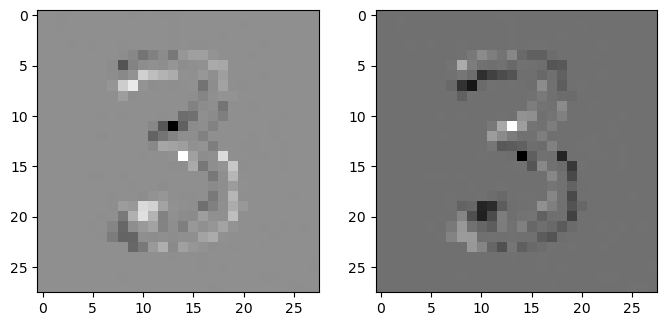

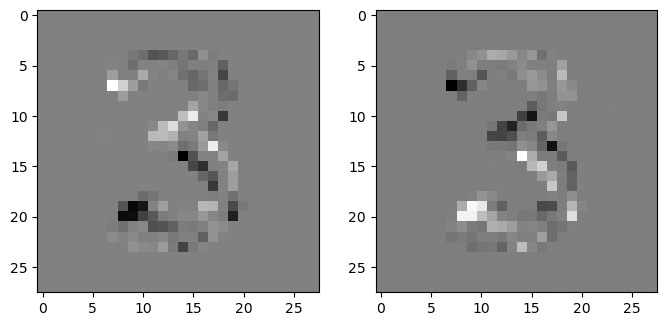

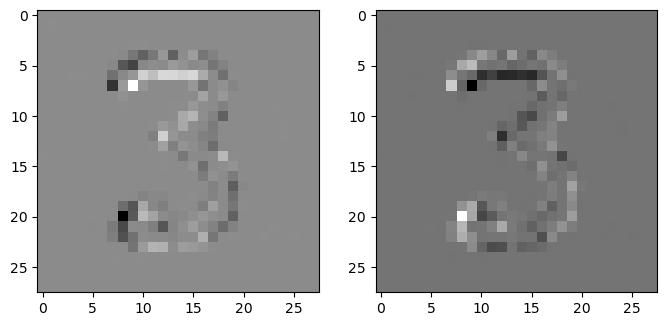

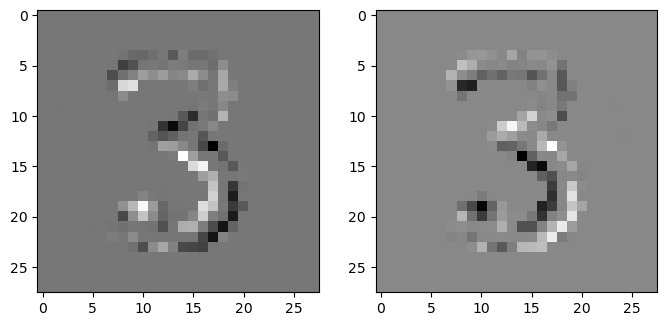

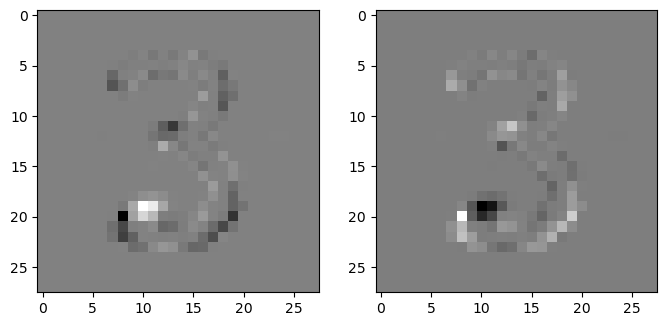

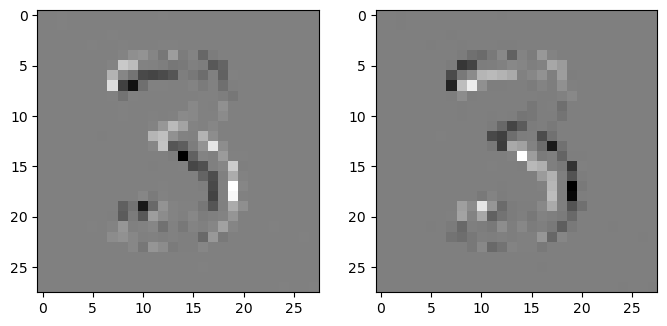

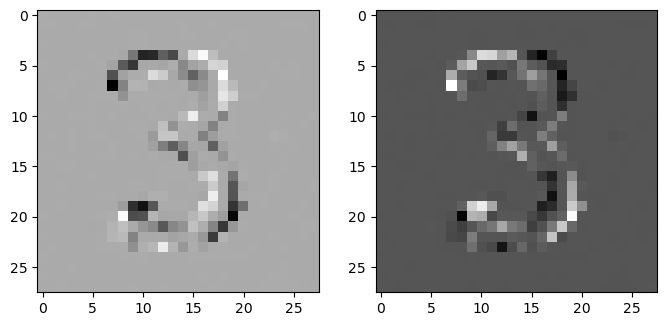

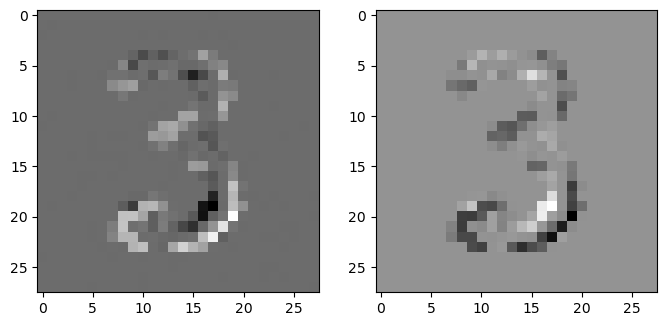

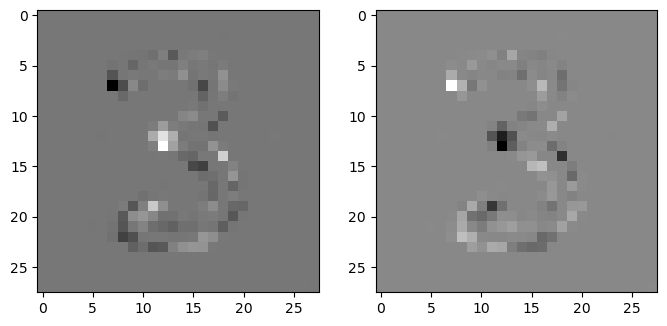

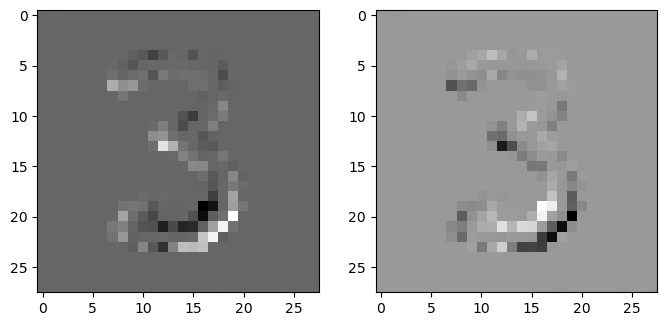

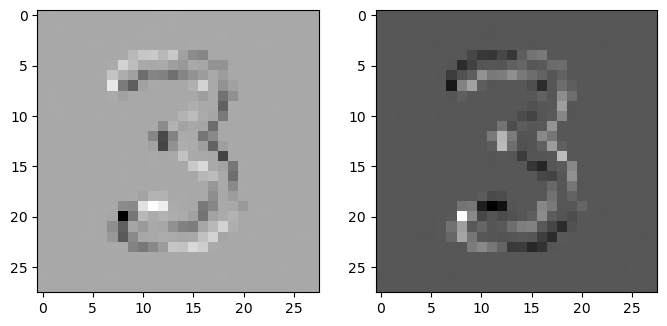

In [14]:
for i in range(16):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(H[i], cmap="gray")
    axs[1].imshow(-1 * H[i], cmap="gray")
    plt.show()

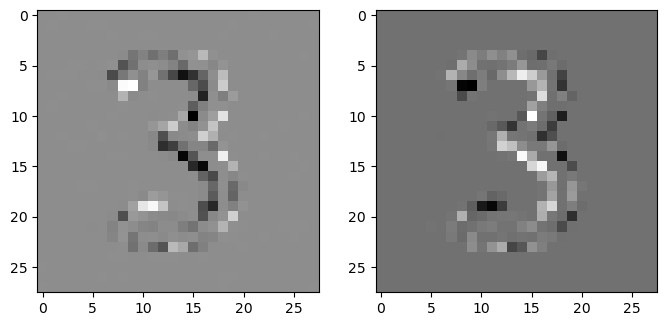

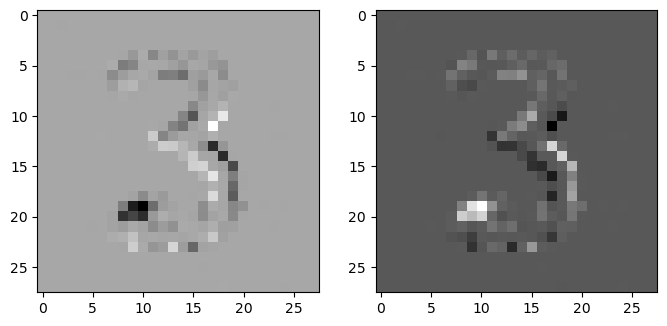

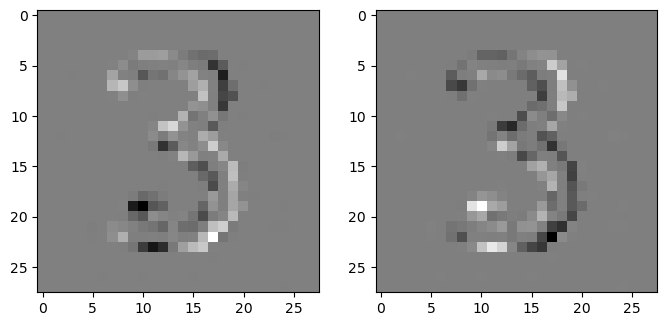

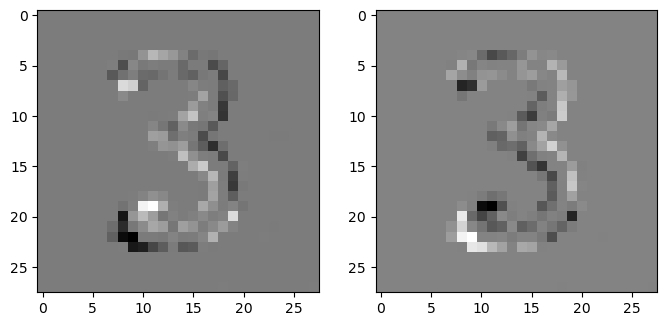

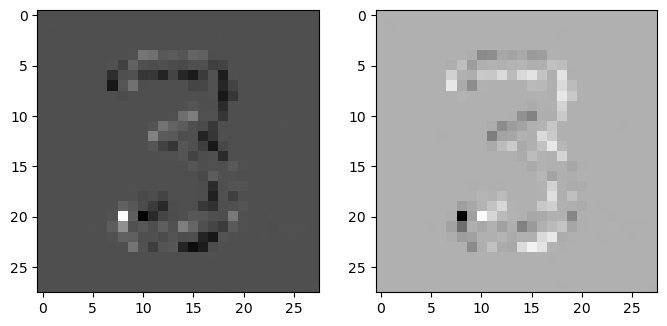

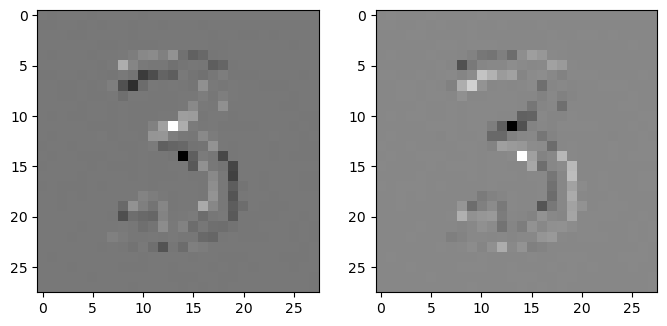

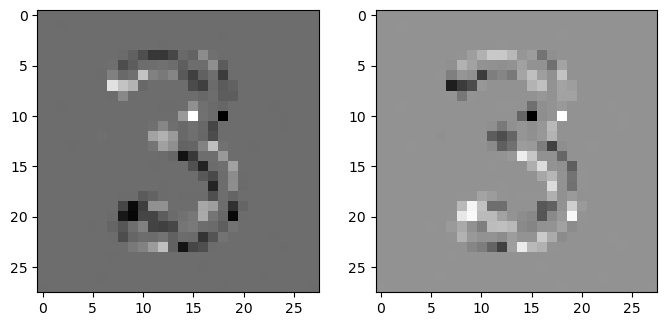

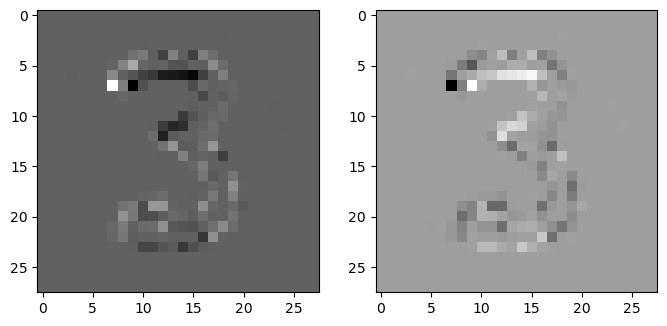

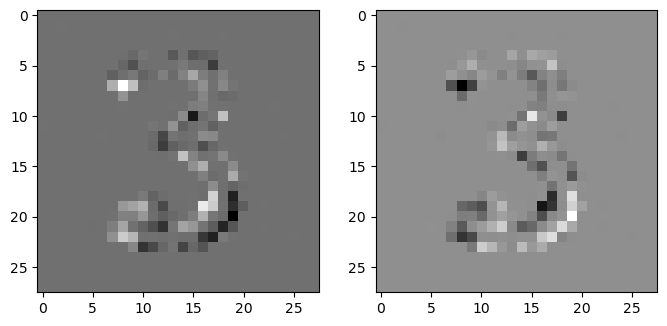

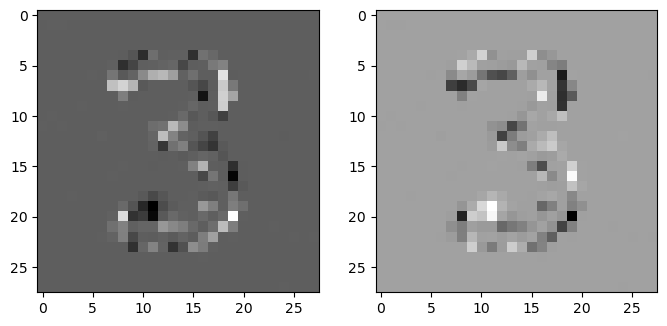

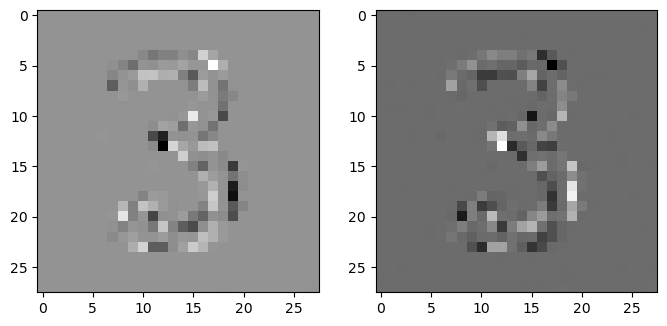

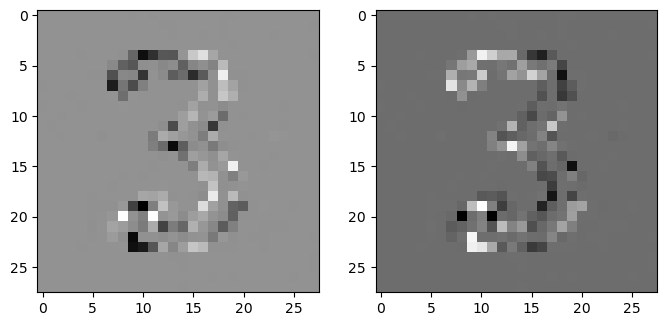

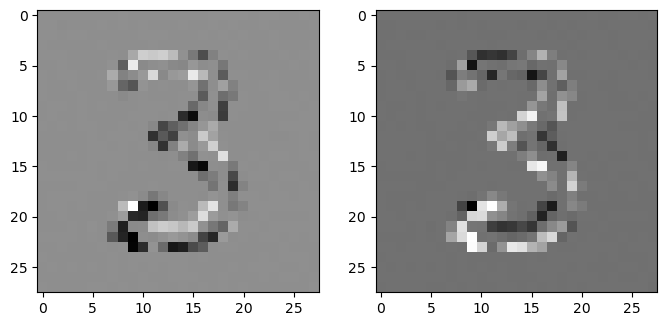

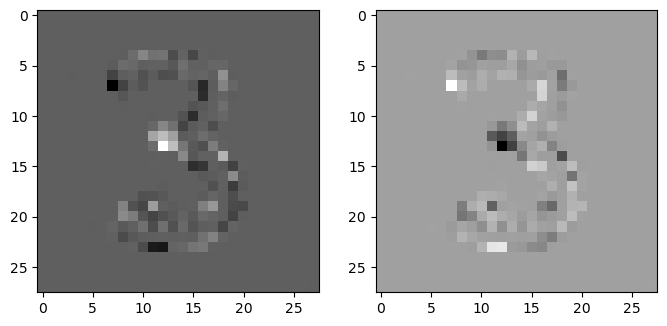

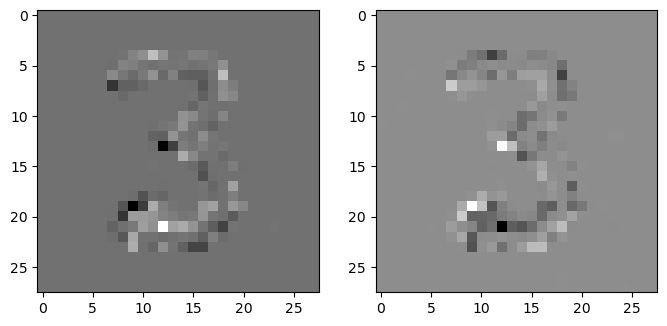

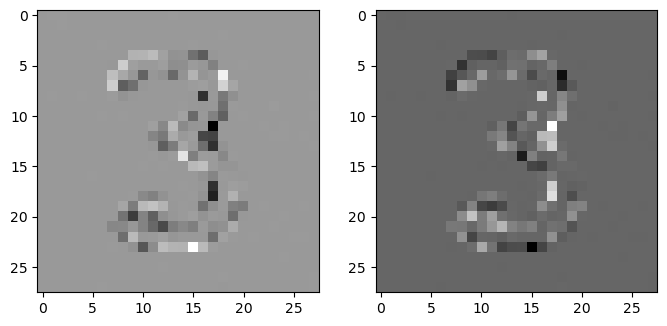

In [15]:
with torch.no_grad():
    Q, R = torch.linalg.qr(G)
    H = Q.T.resize(16, 28, 28)

for i in range(16):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(H[i], cmap="gray")
    axs[1].imshow(-1 * H[i], cmap="gray")
    plt.show()

In [16]:
torch.diag(R)

tensor([-0.3176, -0.3148,  0.3008,  0.3011, -0.3014, -0.2284,  0.3199, -0.2987,
         0.3010, -0.2513, -0.1841,  0.2475, -0.2626,  0.2539, -0.1917,  0.2261])

In [21]:
torch.diag(R) ** 2 / (R**2).sum(0)

tensor([1.0000, 0.8958, 0.8856, 0.9443, 0.8205, 0.7063, 0.7815, 0.6869, 0.4706,
        0.4539, 0.3389, 0.4803, 0.6059, 0.6206, 0.2941, 0.3076])

In [23]:
torch.histogram(torch.diag(R) ** 2 / (R**2).sum(0), bins=10)

torch.return_types.histogram(
hist=tensor([3., 0., 3., 0., 2., 2., 1., 1., 2., 2.]),
bin_edges=tensor([0.2941, 0.3647, 0.4353, 0.5059, 0.5765, 0.6470, 0.7176, 0.7882, 0.8588,
        0.9294, 1.0000]))